# DTSC670: Foundations of Machine Learning Models
## Module 2
## Assignment 3: Multiple Linear Regression

#### Name: Betty Tai

The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [4]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [5]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"
df = pd.read_csv(fileName)
df

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
...,...,...,...
70,18.068038,16.252976,396.115249
71,2.749494,3.433744,68.351161
72,2.785527,2.817559,58.948555
73,16.147826,16.344096,382.447605


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

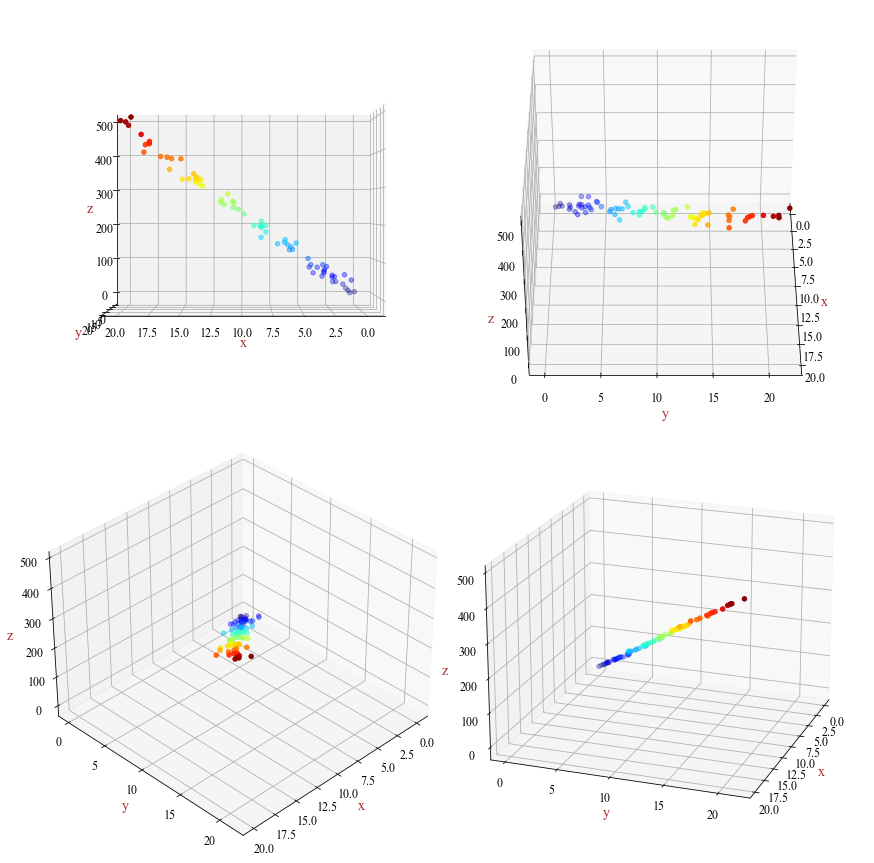

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'


### ENTER CODE HERE ###
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0, wspace=0)
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')
from sklearn.linear_model import LinearRegression
# Data for three-dimensional scattered points
# I isolated the pandas series of df["insert here"] of different axes. 
zdata = df["z"]
xdata = df["x"]
ydata = df["y"]
scatter_plot1 = ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot2 = ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot3 = ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot4 = ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));

# calling the class view_init is needed to change the angles we are looking at. I iteratively guessed on the numbers 
# until I found the right view. I don't think its perfect but it's close enough. 
left_top = ax1.view_init(0, 90)
right_top = ax2.view_init(39,0)
bottom_left = ax3.view_init(35, 45)
bottom_right = ax4.view_init(20, 20)

#ax1.set_xlim(0, 10)
#ax1.set_ylim(0, 10)
#ax1.set_zlim(0, 10)

## setting labels for axes
ax1.set_xlabel('x', color = "brown")
ax1.set_ylabel('y', color = "brown")
ax1.set_zlabel('z', color = "brown")
ax2.set_xlabel('x', color = "brown")
ax2.set_ylabel('y', color = "brown")
ax2.set_zlabel('z', color = "brown")
ax3.set_xlabel('x', color = "brown")
ax3.set_ylabel('y', color = "brown")
ax3.set_zlabel('z', color = "brown")
ax4.set_xlabel('x', color = "brown")
ax4.set_ylabel('y', color = "brown")
ax4.set_zlabel('z', color = "brown")

fig.tight_layout()

plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [8]:
from sklearn.linear_model import LinearRegression

df_copy = df.copy()
X = df_copy.drop("z", axis=1)
y = df["z"].copy()
model = LinearRegression()
model.fit(X, y)
print('Coefficient for model is ' + str(model.coef_))
print('Intercept for model is '+ str(model.intercept_))

Coefficient for model is [ 8.02602396 15.95639323]
Intercept for model is -8.63287677506068


# Create Second Image

Use the following `x_test` and `y_test` data to compute `z_test` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [14]:
import numpy as np
# Plot Curve Fit
x_test = np.linspace(0,21,1000)
y_test = x_test
### ENTER CODE HERE ###
xy_test = np.vstack((x_test, y_test)).T
z_test = model.predict(xy_test)



(1000, 2)


Recreate the first image, but plot the line of best fit in each of the subplots as well.

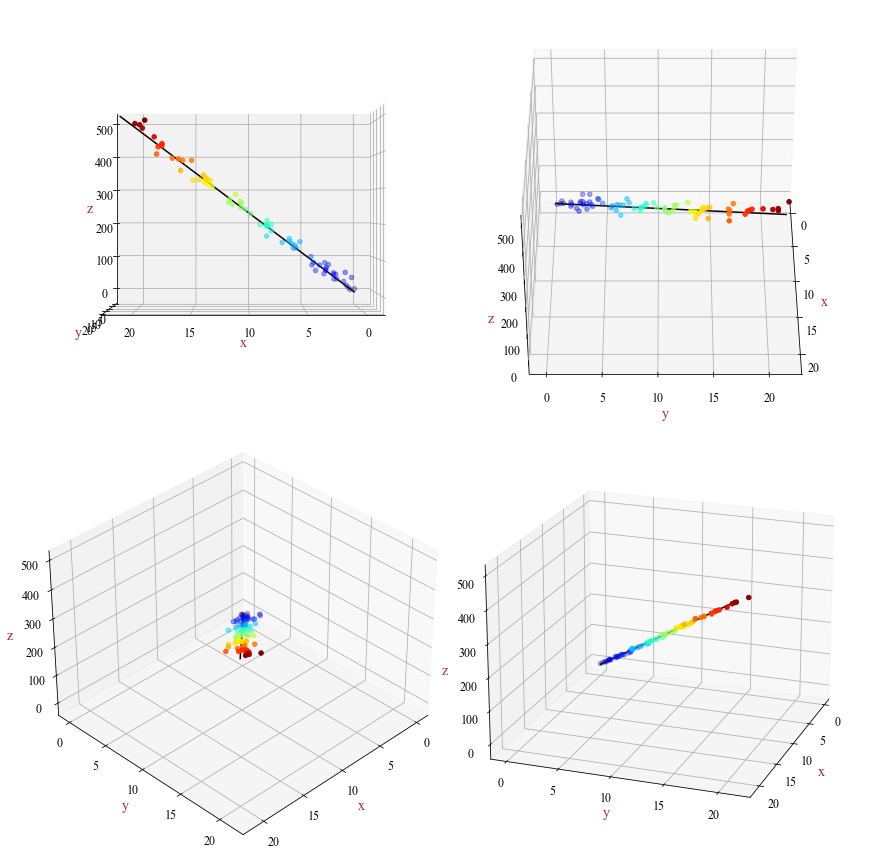

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'


### ENTER CODE HERE ###
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0, wspace=0)
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax1.plot3D(x_test, y_test, z_test, 'black')
ax2.plot3D(x_test, y_test, z_test, 'black')
ax3.plot3D(x_test, y_test, z_test, 'black')
ax4.plot3D(x_test, y_test, z_test, 'black')

from sklearn.linear_model import LinearRegression
# Data for three-dimensional scattered points
# I isolated the pandas series of df["insert here"] of different axes. 
zdata = df["z"]
xdata = df["x"]
ydata = df["y"]
scatter_plot1 = ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot2 = ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot3 = ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));
scatter_plot4 = ax4.scatter3D(xdata, ydata, zdata, c=zdata, cmap=plt.get_cmap("jet"));

# calling the class view_init is needed to change the angles we are looking at. I iteratively guessed on the numbers 
# until I found the right view. I don't think its perfect but it's close enough. 
left_top = ax1.view_init(0, 90)
right_top = ax2.view_init(39,0)
bottom_left = ax3.view_init(35, 45)
bottom_right = ax4.view_init(20, 20)

## setting labels for axes
ax1.set_xlabel('x', color = "brown")
ax1.set_ylabel('y', color = "brown")
ax1.set_zlabel('z', color = "brown")
ax2.set_xlabel('x', color = "brown")
ax2.set_ylabel('y', color = "brown")
ax2.set_zlabel('z', color = "brown")
ax3.set_xlabel('x', color = "brown")
ax3.set_ylabel('y', color = "brown")
ax3.set_zlabel('z', color = "brown")
ax4.set_xlabel('x', color = "brown")
ax4.set_ylabel('y', color = "brown")
ax4.set_zlabel('z', color = "brown")

fig.tight_layout()

plt.show()

# Infer the True Model Parameters

Provided that the true model parameters are integer values, infer the true model parameters based on the optimal model parameter values that you calculated above.  You may "hard-code" these values into the below print statements.

In [44]:
print("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.63287677506068
